# Neural Network using tensorflow
for this model whe used some information from "https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/"

In [1]:
# import libraries
import tensorflow.keras as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [2]:
# load data
complete_df = pd.read_csv('data/AmesHousingPreprocessed.csv')
complete_df = complete_df.drop('Unnamed: 0', axis=1)
display(complete_df)

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Year Remod/Add,Full Bath,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,SalePrice.1
0,0,0,0,0,1,0,0,0,0,0,...,-1.155886,-1.019607,-0.368243,1.281557,0.065626,0.258714,0.309465,0.313663,-0.061812,5.332438
1,0,0,0,0,1,0,0,0,0,0,...,-1.107938,-1.019607,-0.335146,-0.675537,-0.384244,1.197200,-1.003952,-1.192617,-0.771063,5.021189
2,0,0,0,0,1,0,0,0,0,0,...,-1.251781,-1.019607,-0.434438,0.439492,0.631372,-0.744814,-1.003952,-0.334434,-0.061812,5.235528
3,0,0,0,0,1,0,0,0,0,0,...,-0.772303,0.794069,-0.103465,2.450663,2.405858,0.230839,0.309465,1.213467,0.647439,5.387390
4,0,0,0,0,0,0,0,0,0,1,...,0.666134,0.794069,0.856357,-0.593133,-0.279728,0.045000,0.309465,0.260151,-0.771063,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,0,0,0,0,0,0,0,0,0,0,...,-0.005137,-1.019607,0.426092,-0.399998,-0.109323,0.537472,0.309465,-0.980548,-0.061812,5.153815
2899,0,0,0,0,1,0,0,0,0,0,...,-0.053085,-1.019607,0.392995,-0.660086,-0.425141,0.054292,0.309465,-1.180725,-0.771063,5.117271
2900,0,0,0,0,0,0,0,0,0,0,...,0.378446,-1.019607,0.690871,-0.484977,-0.316081,-2.194355,-2.317368,-1.045953,-0.771063,5.120574
2901,0,0,0,0,1,0,0,0,0,0,...,-0.436668,-1.019607,0.095119,0.593999,0.767696,-0.252342,0.309465,-0.215517,-0.771063,5.230449


In [3]:
# split data into input and target
target = complete_df['SalePrice']
input_df = complete_df.drop('SalePrice', axis=1)

display(input_df.head())

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Year Remod/Add,Full Bath,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,SalePrice.1
0,0,0,0,0,1,0,0,0,0,0,...,-1.155886,-1.019607,-0.368243,1.281557,0.065626,0.258714,0.309465,0.313663,-0.061812,5.332438
1,0,0,0,0,1,0,0,0,0,0,...,-1.107938,-1.019607,-0.335146,-0.675537,-0.384244,1.197200,-1.003952,-1.192617,-0.771063,5.021189
2,0,0,0,0,1,0,0,0,0,0,...,-1.251781,-1.019607,-0.434438,0.439492,0.631372,-0.744814,-1.003952,-0.334434,-0.061812,5.235528
3,0,0,0,0,1,0,0,0,0,0,...,-0.772303,0.794069,-0.103465,2.450663,2.405858,0.230839,0.309465,1.213467,0.647439,5.387390
4,0,0,0,0,0,0,0,0,0,1,...,0.666134,0.794069,0.856357,-0.593133,-0.279728,0.045000,0.309465,0.260151,-0.771063,5.278525


In [4]:
# convert the pandas dataframes to numpy ndarrays
X_np = input_df.to_numpy()
y_np = target.to_numpy()

# split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, train_size=0.7, random_state=1265599650)

# find number of features
n_features = input_df.shape[1]

In [5]:
# define metrics
# Root Mean Square Error function from Keras Metrics. 
# source: https://www.tensorflow.org/api_docs/python/tf/keras/metrics/RootMeanSquaredError
m1 = tf.metrics.RootMeanSquaredError()
m2 = 'mean_absolute_percentage_error'

# create layers
model = tf.Sequential([
    Dense(1, input_shape=(n_features,)),
])

# compile model
# use Adam as optimizer because of fast and accurate converging 
# source: https://medium.com/mdr-inc/from-sgd-to-adam-c9fce513c4bb 
model.compile(optimizer='Adam', loss=tf.metrics.mean_squared_error, metrics=[m1, m2])

In [6]:
# fit the model
# choose batch size of 32 after trying 32, 64 and 128
# source: https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch
model.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_test, y_test))

Epoch 1/100
64/64 [==============================] - 2s 11ms/step - loss: 15.4421 - root_mean_squared_error: 3.9296 - mean_absolute_percentage_error: 74.1674 - val_loss: 8.1317 - val_root_mean_squared_error: 2.8516 - val_mean_absolute_percentage_error: 54.2974
Epoch 2/100
64/64 [==============================] - ETA: 0s - loss: 4.7891 - root_mean_squared_error: 2.1884 - mean_absolute_percentage_error: 40.889 - 0s 5ms/step - loss: 4.4373 - root_mean_squared_error: 2.1065 - mean_absolute_percentage_error: 39.0775 - val_loss: 1.9394 - val_root_mean_squared_error: 1.3926 - val_mean_absolute_percentage_error: 25.8676
Epoch 3/100
64/64 [==============================] - 0s 4ms/step - loss: 0.9627 - root_mean_squared_error: 0.9812 - mean_absolute_percentage_error: 17.0660 - val_loss: 0.4033 - val_root_mean_squared_error: 0.6351 - val_mean_absolute_percentage_error: 10.4648
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 0.2290 - root_mean_squared_error: 0.4786 - mean_

64/64 [==============================] - 0s 4ms/step - loss: 0.0210 - root_mean_squared_error: 0.1448 - mean_absolute_percentage_error: 2.1380 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1552 - val_mean_absolute_percentage_error: 2.2430
Epoch 33/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0203 - root_mean_squared_error: 0.1425 - mean_absolute_percentage_error: 2.0859 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1515 - val_mean_absolute_percentage_error: 2.2003
Epoch 34/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0196 - root_mean_squared_error: 0.1401 - mean_absolute_percentage_error: 2.0572 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1494 - val_mean_absolute_percentage_error: 2.1634
Epoch 35/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0190 - root_mean_squared_error: 0.1378 - mean_absolute_percentage_error: 2.0215 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1483 - val_mean_absolute_percen

Epoch 64/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0097 - root_mean_squared_error: 0.0985 - mean_absolute_percentage_error: 1.3895 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1134 - val_mean_absolute_percentage_error: 1.5511
Epoch 65/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0095 - root_mean_squared_error: 0.0974 - mean_absolute_percentage_error: 1.3788 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1123 - val_mean_absolute_percentage_error: 1.5290
Epoch 66/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0093 - root_mean_squared_error: 0.0964 - mean_absolute_percentage_error: 1.3560 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1114 - val_mean_absolute_percentage_error: 1.5173
Epoch 67/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0091 - root_mean_squared_error: 0.0953 - mean_absolute_percentage_error: 1.3407 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1103 - val_mean_ab

Epoch 96/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0046 - root_mean_squared_error: 0.0680 - mean_absolute_percentage_error: 0.9267 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0879 - val_mean_absolute_percentage_error: 1.1274
Epoch 97/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0045 - root_mean_squared_error: 0.0673 - mean_absolute_percentage_error: 0.9237 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0871 - val_mean_absolute_percentage_error: 1.0814
Epoch 98/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0045 - root_mean_squared_error: 0.0667 - mean_absolute_percentage_error: 0.9082 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0868 - val_mean_absolute_percentage_error: 1.1069
Epoch 99/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0043 - root_mean_squared_error: 0.0659 - mean_absolute_percentage_error: 0.8951 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0861 - val_mean_ab

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 229       
                                                                 
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________


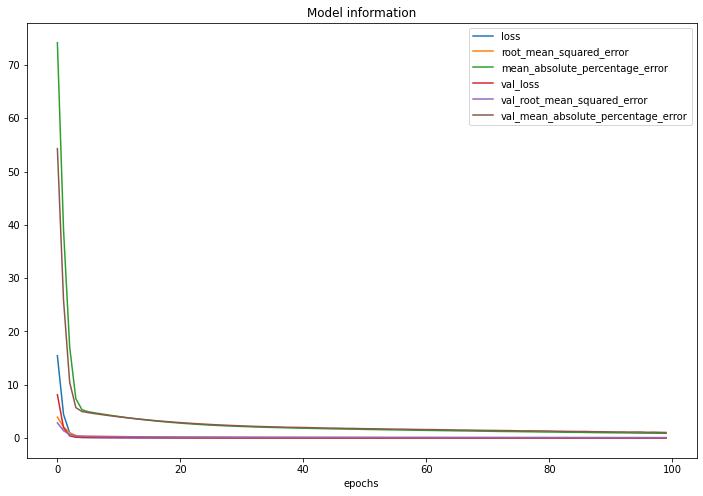

In [8]:
loss_df = pd.DataFrame(model.history.history)

loss_df.plot(figsize=(12,8))
plt.title("Model information")
plt.xlabel("epochs")
plt.show()

In [10]:
from sklearn import metrics

y_pred = model.predict(X_test)
var_score = metrics.explained_variance_score(y_test,y_pred)
# compute the accuracy of the model 
print('Variance score:', var_score)
print('\nRMSE:',loss_df['root_mean_squared_error'].tail(1))
print('\nLoss:',loss_df['loss'].tail(1))
print('\nMAPE:',loss_df['mean_absolute_percentage_error'].tail(1))

Variance score: 0.7761942182107131

RMSE: 99    0.065434
Name: root_mean_squared_error, dtype: float64

Loss: 99    0.004282
Name: loss, dtype: float64

MAPE: 99    0.887006
Name: mean_absolute_percentage_error, dtype: float64


### Model 2

In [9]:
#### verebeterpunten:
# validation data gebruiken
# k folds
# andere metrics voor aflezen
# adam vs andere andere sgd methods testen
# hidden layers toevoegen
# aantal nodes per layer aanpassen
# batchsize aanpassen (32, 64 of 128)
# aantal epochs 
# onze loss plotten